In [35]:
using DataFrames, CSV, Plots, StatsBase, Statistics, Formatting, LaTeXStrings

In [55]:
concrete_df = dropmissing(CSV.File("../../data/ConcreteUCI.csv") |> DataFrame)
strength_categories = Array(["very low", "low", "medium", "high", "very high"])
predictor_names = Array(["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age (day)"])
concrete_matrix = Matrix{Real}(concrete_df[:,predictor_names]);

In [56]:
num_predictors = length(predictor_names)
num_categories = length(strength_categories)
num_observations = nrow(concrete_df)
print("N = $num_observations\n")
print("D = $num_predictors\n")
latexify("D = %$num_predictors") |> display
latexify("L = %$num_categories") |> display
for i in 1:num_categories
    n = nrow(subset(concrete_df, :Category => ByRow(==(i))))
    latexify(L"N_{L_{%$i}} = %$n") |> display
end

N = 1030
D = 8
L = 5
$N_{L_{1}} = 141 \n$$N_{L_{2}} = 304 \n$$N_{L_{3}} = 354 \n$$N_{L_{4}} = 161 \n$$N_{L_{5}} = 70 \n$

In [62]:
predictors_statistics_df = DataFrame()

for predictor_name in predictor_names
    predictor_array = Array(concrete_df[:, predictor_name])
    append!(predictors_statistics_df, DataFrame(mean = mean(predictor_array), std = std(predictor_array), gamma = skewness(predictor_array)))
end
predictors_statistics_df

,mean,std,gamma
,Float64,Float64,Float64
1,281.168,104.506,0.508739
2,73.8958,86.2793,0.79955
3,54.1883,63.997,0.536571
4,181.567,21.3542,0.0745197
5,6.20466,5.97384,0.905881
6,972.919,77.754,-0.0401611
7,773.58,80.176,-0.252641
8,45.6621,63.1699,3.26441


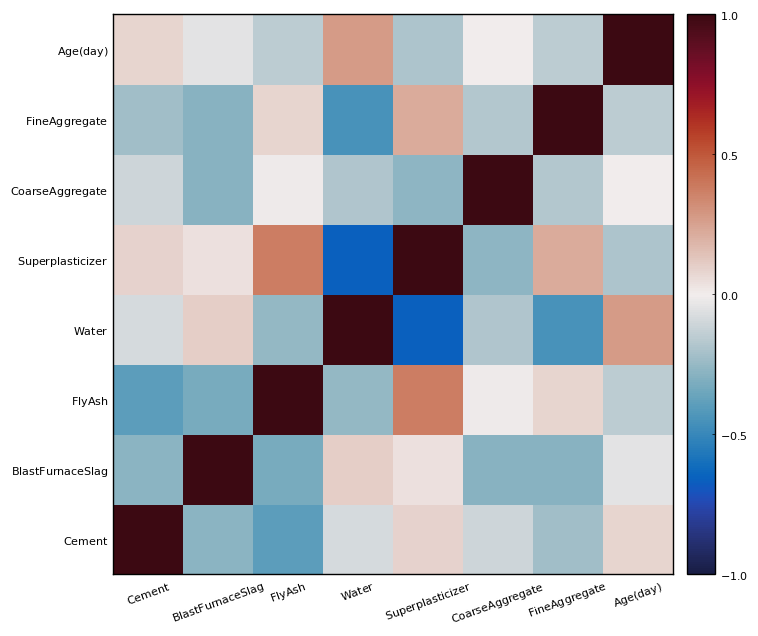

In [189]:
predictors_corr_matrix = cor(concrete_matrix, concrete_matrix)
pyplot()
f1 = heatmap(predictor_names, predictor_names, predictors_corr_matrix,xtickfontrotation=20,framestyle=:box,clim=(-1,1),color=:balance,aspect_ratio=:equal,size=(800,720))
savefig(f1,"../figures/predictors_corr_matrix.pdf")

In [8]:
plot_matrix = Matrix{}(undef,num_predictors,num_predictors);

for i in 1:num_predictors
    for j in 1:num_predictors
        if i == j
            plot_matrix[i,j] = histogram(concrete_df[:,i])
        else
            plot_matrix[i,j] = scatter(concrete_df[:,i],concrete_df[:,j])
        end
    end    
end

f2 = plot(plot_matrix[:]..., layout=(num_predictors,num_predictors), size=(3000,3000), axis=false, ticks=false, legend=false)

savefig(f2,"../figures/matrix-corplot.pdf");